# DS-SF-30 | Codealong 04: Exploratory Data Analysis

In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Part A - Activity | The _pandas_ Library

In [2]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dave', 'Eve', 'Frank'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'age': [24, 34, 44, 41, 52, 43],
    'marital_status': [0, 2, 1, 2, 0, 1]}).\
        set_index('name')

In [3]:
df

,age,gender,marital_status
name,,,
Alice,24,Female,0
Bob,34,Male,2
Carol,44,Female,1
Dave,41,Male,2
Eve,52,Female,0
Frank,43,Male,1


> ### Question 1.  Subset the dataframe on the age and gender columns

In [4]:
df[['age', 'gender']]

,age,gender
name,,
Alice,24,Female
Bob,34,Male
Carol,44,Female
Dave,41,Male
Eve,52,Female
Frank,43,Male


> ### Question 2.  Subset the dataframe on the age column alone, first as a `DataFrame`, then as a `Series`

In [5]:
df[['age']]

,age
name,
Alice,24
Bob,34
Carol,44
Dave,41
Eve,52
Frank,43


In [6]:
df.age

name
Alice    24
Bob      34
Carol    44
Dave     41
Eve      52
Frank    43
Name: age, dtype: int64

> ### Question 3.  Subset the dataframe on the rows Bob and Carol

In [7]:
df.loc[['Bob','Carol']]

,age,gender,marital_status
name,,,
Bob,34,Male,2
Carol,44,Female,1


> ### Question 4.  Subset the dataframe on the row Eve alone, first as a `DataFrame`, then as a `Series`

In [8]:
df.loc[["Eve"]]

,age,gender,marital_status
name,,,
Eve,52,Female,0


In [9]:
df.loc["Eve"]

age                   52
gender            Female
marital_status         0
Name: Eve, dtype: object

> ### Question 5.  How old is Frank?

In [10]:
#df['age']['Frank']
#df.loc['Frank']['age']
df.age.Frank
df.at['Frank','age']

43

> ### Question 6.  What is the men’s mean age, the women’s median age?

In [11]:
df[df['gender']=='Male']['age'].mean()
# or df[df.gender == "Male"].mean().age

39.333333333333336

In [12]:
df[df['gender']=='Female']['age'].median()


44.0

## Part B

- `.mean()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)
- `.var()`, `.std()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html)

In [13]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-04-zillow.csv'), index_col = 'ID')

In [14]:
df

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.0,0.0,1.0,NaN,550.0,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.0,0.0,NaN,2.0,1430.0,2435.0,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5600000.0,0.0,2.0,3.5,2040.0,3920.0,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1500000.0,0.0,1.0,1.0,1060.0,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,970000.0,0.0,2.0,2.0,1299.0,NaN,1993.0
15064295,"111 Chestnut St APT 702, San Francisco, CA",12/17/15,940000.0,0.0,2.0,2.0,1033.0,NaN,1993.0
15064391,"1821 Grant Ave APT 101, San Francisco, CA",12/15/15,835000.0,0.0,1.0,1.0,1048.0,NaN,1975.0
15064536,"2300 Leavenworth St, San Francisco, CA",12/4/15,2830000.0,0.0,3.0,2.0,2115.0,1271.0,1913.0
15064640,"1047-1049 Lombard St, San Francisco, CA",1/14/16,4050000.0,1.0,NaN,NaN,4102.0,3049.0,1948.0


### `Series.mean()` - Compute the `Series` mean value

In [15]:
df.SalePrice.mean()

1397422.943

> #### Activity: What's `Size`'s mean?

In [16]:
df.Size.mean()

1641.3009307135471

> #### Activity: What fraction of the properties sold in the dataset are studios?

In [17]:
len(df[df.IsAStudio == 1]) /float(len (df))
#or 
df.IsAStudio.sum() / df.shape[0]

0.029

In [18]:
df.IsAStudio.mean() # NaN is skipped

0.029411764705882353

### `DataFrame.mean()` - Compute the `DataFrame` mean value

### `.var()` - Compute the unbiased variance (normalized by `N-1` by default)

In [19]:
# TODO

> #### Activity: What's the variance for the number of beds in the dataset?

In [20]:
df.Beds.std()

1.2508914392899417

### `.std()` - Compute the unbiased standard deviation (normalized by `N-1` by default)

In [21]:
# TODO

> #### Activity: What's the standard deviation for the number of beds in the dataset?

In [22]:
# TODO

## Part C

- `.median()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.median.html)
- `.count()`, `.sum()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sum.html)
- `.count()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
- `.min()`, `.max()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html)
- `.quantile()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.quantile.html)
- `.describe()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### `.median()` - Compute the median value

In [23]:
df.median()

SalePrice      1100000.0
IsAStudio            0.0
Beds                 2.0
Baths                2.0
Size              1350.0
LotSize           2622.0
BuiltInYear       1939.0
dtype: float64

> #### Activity: What's the median sale price for properties in the dataset?

In [24]:
df.SalePrice.median()

1100000.0

### `.count()` - Compute the number of rows/observations without `NaN` and `.sum()` - Compute the sum of the values

In [25]:
df.count() # skips NaN

Address        1000
DateOfSale     1000
SalePrice      1000
IsAStudio       986
Beds            836
Baths           942
Size            967
LotSize         556
BuiltInYear     975
dtype: int64

In [26]:
df.IsAStudio.count()

986

`count()` counts the number of non-`NaN` values:

In [27]:
df.IsAStudio.dropna().shape[0]

986

In [28]:
df.IsAStudio.isnull().sum()

14

Which leaves 14 houses for which we don't know if they are studios or not.

In [29]:
df.IsAStudio.dropna().shape[0] + df.IsAStudio.isnull().sum()

1000

In [30]:
df.IsAStudio.sum()

29.0

29 properties are studios.

### `.min()` and `.max()` - Compute the minimum and maximum values

In [31]:
df.min()

Address        1 Crescent Way APT 1402, San Francisco, CA
DateOfSale                                        1/10/16
SalePrice                                               1
IsAStudio                                               0
Beds                                                    1
Baths                                                   1
Size                                                  264
LotSize                                                44
BuiltInYear                                          1870
dtype: object

> #### Activity: What are properties that were sold at the lowest price?  At what price?

In [32]:
df.SalePrice.min()
df.loc[df.SalePrice == df.SalePrice.min()]

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15149005,"251-253 Missouri St, San Francisco, CA",12/23/15,1.0,0.0,7.0,6.0,2904.0,2482.0,1900.0


In [33]:
df.max().SalePrice

32700000.000000004

> #### Activity: What are properties that were sold at the highest price?  At what price?

In [34]:
# TODO

### `.quantile()` - Compute values at the given quantile

In [36]:
df.quantile(.5)

SalePrice      1100000.0
IsAStudio            NaN
Beds                 NaN
Baths                NaN
Size                 NaN
LotSize              NaN
BuiltInYear          NaN
dtype: float64

In [37]:
df.median()

SalePrice      1100000.0
IsAStudio            0.0
Beds                 2.0
Baths                2.0
Size              1350.0
LotSize           2622.0
BuiltInYear       1939.0
dtype: float64

In [38]:
df.quantile(.25)

SalePrice      800000.0
IsAStudio           NaN
Beds                NaN
Baths               NaN
Size                NaN
LotSize             NaN
BuiltInYear         NaN
dtype: float64

In [39]:
df.quantile(.75)

SalePrice      1532500.0
IsAStudio            NaN
Beds                 NaN
Baths                NaN
Size                 NaN
LotSize              NaN
BuiltInYear          NaN
dtype: float64

### `.describe()` - Generate various summary statistics

In [40]:
df.describe()

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
count,1.000000e+03,986.000000,836.000000,942.000000,967.000000,556.000000,975.000000
mean,1.397423e+06,0.029412,2.572967,1.977548,1641.300931,3020.640288,1947.533333
std,1.736413e+06,0.169043,1.250891,1.130334,1027.016175,2853.430139,38.021563
min,1.000000e+00,0.000000,1.000000,1.000000,264.000000,44.000000,1870.000000
25%,8.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.100000e+06,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.532500e+06,NaN,NaN,NaN,NaN,NaN,NaN
max,3.270000e+07,1.000000,9.000000,14.000000,11500.000000,47916.000000,2015.000000


In [44]:
df.describe(include=['object'])

,Address,DateOfSale
count,1000,1000
unique,993,76
top,"1954 Golden Gate Ave, San Francisco, CA",11/20/15
freq,2,47


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 15063471 to 2136213970
Data columns (total 9 columns):
Address        1000 non-null object
DateOfSale     1000 non-null object
SalePrice      1000 non-null float64
IsAStudio      986 non-null float64
Beds           836 non-null float64
Baths          942 non-null float64
Size           967 non-null float64
LotSize        556 non-null float64
BuiltInYear    975 non-null float64
dtypes: float64(7), object(2)
memory usage: 78.1+ KB


In [46]:
df.SalePrice.describe()

count    1.000000e+03
mean     1.397423e+06
std      1.736413e+06
min      1.000000e+00
25%      8.000000e+05
50%      1.100000e+06
75%      1.532500e+06
max      3.270000e+07
Name: SalePrice, dtype: float64

In [47]:
df.Address.describe()

count                                        1000
unique                                        993
top       1954 Golden Gate Ave, San Francisco, CA
freq                                            2
Name: Address, dtype: object

## Part D

- Boxplots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)

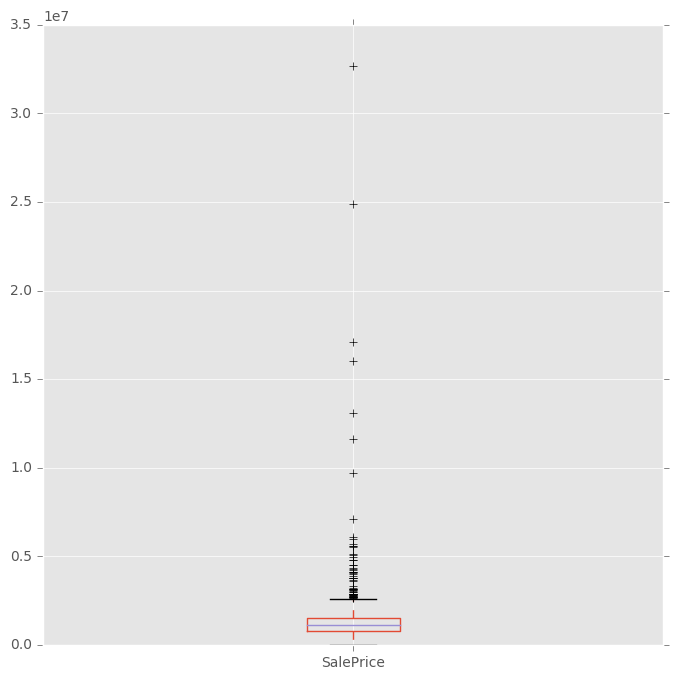

In [48]:
df.SalePrice.plot(kind = 'box', figsize = (8, 8))

/Users/Elizabeth/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x1163ee6d0>],
 'caps': [<matplotlib.lines.Line2D at 0x1163fc610>,
 'fliers': [<matplotlib.lines.Line2D at 0x116408910>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1164082d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1163ee8d0>,
  <matplotlib.lines.Line2D at 0x1163eef90>]}

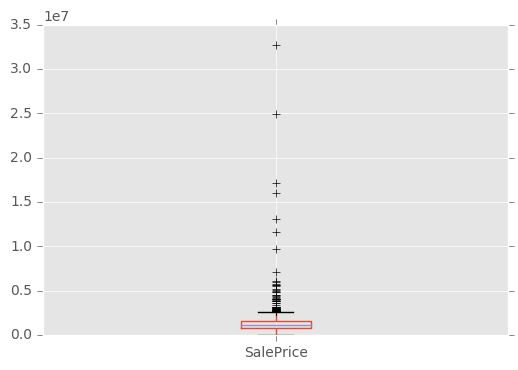

In [49]:
df[['SalePrice']].boxplot(figsize = (8, 8))

> In the same plot, plot the boxplots of `Beds` and `Baths`

/Users/Elizabeth/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x1168628d0>,
 'caps': [<matplotlib.lines.Line2D at 0x116871810>,
 'fliers': [<matplotlib.lines.Line2D at 0x11687cb10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11687c4d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x116862ad0>,
  <matplotlib.lines.Line2D at 0x116889dd0>]}

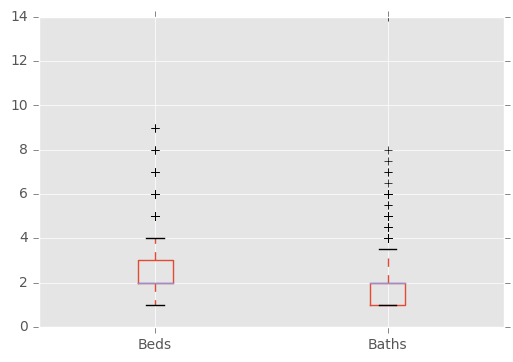

In [52]:
df[['Beds','Baths']].boxplot()

## Part E

- Histograms
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html)

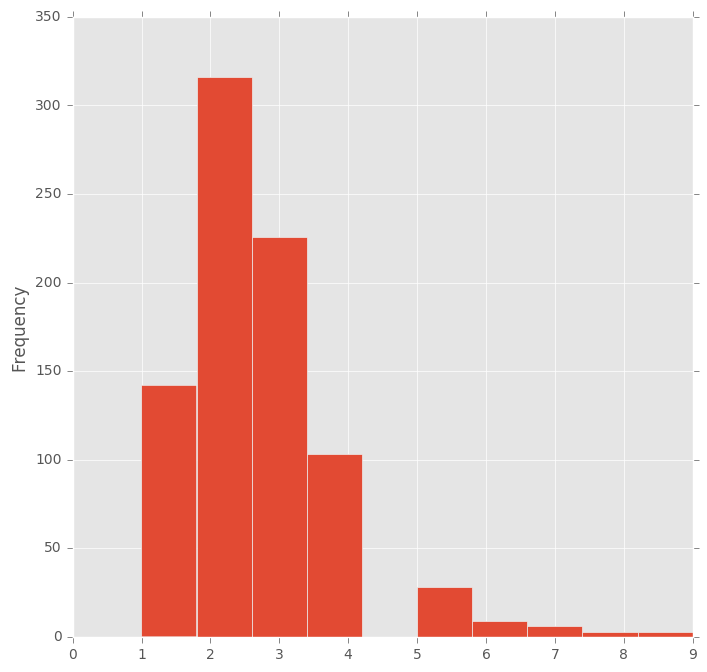

In [53]:
df.Beds.plot(kind = 'hist', figsize = (8, 8))

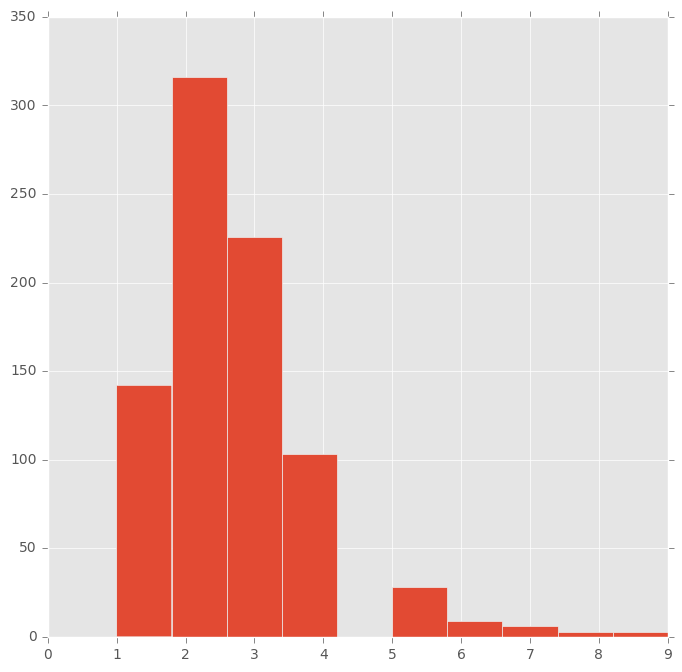

In [54]:
df.Beds.hist(figsize = (8, 8))

> #### Activity: In the same plot, plot the histograms of `Beds` and `Baths`

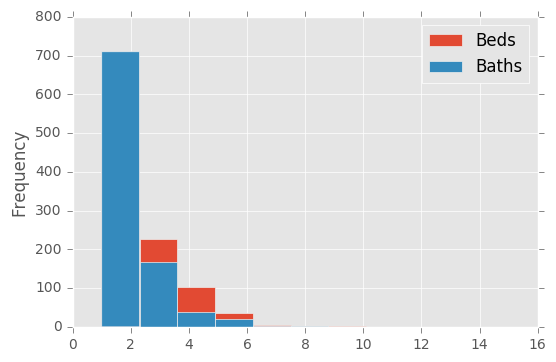

In [57]:
df[['Beds','Baths']].plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11734acd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117511750>]], dtype=object)

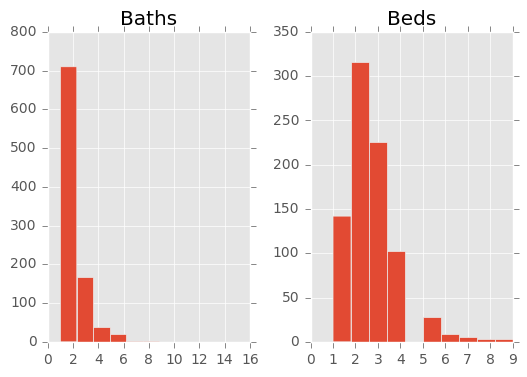

In [59]:
df[['Beds','Baths']].hist()

## Part F

- `.mode()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mode.html)

### `.mode()` - Compute the mode value(s)

In [60]:
df.mode()

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
0,"1 Mono St # B, San Francisco, CA",11/20/15,1100000.0,0.0,2.0,1.0,1000.0,2495.0,1900.0
1,"150 Grand View Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1915 Diamond St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1954 Golden Gate Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2299 Market St APT 502, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"643 Natoma St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"829 Folsom St UNIT 906, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.Address.mode()

0             1 Mono St # B, San Francisco, CA
1        150 Grand View Ave, San Francisco, CA
2           1915 Diamond St, San Francisco, CA
3      1954 Golden Gate Ave, San Francisco, CA
4    2299 Market St APT 502, San Francisco, CA
5             643 Natoma St, San Francisco, CA
6    829 Folsom St UNIT 906, San Francisco, CA
dtype: object

In [62]:
df.Baths.mode()

0    1.0
dtype: float64

The `.mode()` method gets the mode(s) of each element along the columns.  Empty if nothing has 2+ occurrences. Adds a row for each mode per label, fills in gaps with `NaN`.  Note that there could be multiple values returned in the columns (when more than one value share the maximum frequency), which is the reason why a dataframe is returned.

In [63]:
df[df.Address == '1 Mono St # B, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
59700333,"1 Mono St # B, San Francisco, CA",12/11/15,1080000.0,0.0,2.0,1.5,1142.0,NaN,1968.0
59779608,"1 Mono St # B, San Francisco, CA",12/11/15,1080000.0,0.0,NaN,NaN,1142.0,NaN,1968.0


In [64]:
df[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
123597964,"829 Folsom St UNIT 906, San Francisco, CA",12/7/15,675000.0,0.0,NaN,NaN,557.0,NaN,2010.0
2121978635,"829 Folsom St UNIT 906, San Francisco, CA",12/6/15,675000.0,0.0,1.0,1.0,557.0,NaN,2010.0


In [65]:
df[df.Address == '1915 Diamond St, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
125156575,"1915 Diamond St, San Francisco, CA",12/30/15,1800000.0,0.0,NaN,1.0,2200.0,4316.0,1910.0
2100850402,"1915 Diamond St, San Francisco, CA",12/29/15,1800000.0,0.0,4.0,3.0,2400.0,4356.0,1910.0


In [66]:
df[df.Address == '1954 Golden Gate Ave, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15084954,"1954 Golden Gate Ave, San Francisco, CA",11/24/15,1100000.0,0.0,2.0,1.0,1515.0,NaN,1895.0
123597223,"1954 Golden Gate Ave, San Francisco, CA",11/24/15,1100000.0,0.0,2.0,1.0,1275.0,NaN,1895.0


In [67]:
df[df.Address == '2299 Market St APT 502, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
124891624,"2299 Market St APT 502, San Francisco, CA",12/4/15,915000.0,0.0,1.0,1.0,691.0,NaN,2013.0
2100902229,"2299 Market St APT 502, San Francisco, CA",12/3/15,915000.0,0.0,1.0,1.0,700.0,NaN,2013.0


In [68]:
df[df.Address == '643 Natoma St, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15147343,"643 Natoma St, San Francisco, CA",12/17/15,875000.0,0.0,2.0,1.0,875.0,NaN,1910.0
123596761,"643 Natoma St, San Francisco, CA",12/17/15,875000.0,0.0,2.0,1.0,830.0,NaN,1910.0


In [69]:
df[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
123597964,"829 Folsom St UNIT 906, San Francisco, CA",12/7/15,675000.0,0.0,NaN,NaN,557.0,NaN,2010.0
2121978635,"829 Folsom St UNIT 906, San Francisco, CA",12/6/15,675000.0,0.0,1.0,1.0,557.0,NaN,2010.0


All duplicate entries...

In [70]:
df[df.DateOfSale == '11/20/15']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15072263,"1795 Green St, San Francisco, CA",11/20/15,2500000.0,0.0,3.0,2.0,1647.0,NaN,1908.0
15073657,"1895 Pacific Ave APT 506, San Francisco, CA",11/20/15,975000.0,0.0,1.0,1.0,1165.0,NaN,1931.0
15084143,"270 Ewing Ter, San Francisco, CA",11/20/15,1570000.0,0.0,2.0,1.0,1250.0,2178.0,1940.0
15093664,"591 29th Ave, San Francisco, CA",11/20/15,1750000.0,0.0,3.0,2.5,1800.0,1875.0,1936.0
15100149,"806 39th Ave, San Francisco, CA",11/20/15,1050000.0,0.0,NaN,1.0,1375.0,2374.0,1926.0
15104379,"1466 44th Ave, San Francisco, CA",11/20/15,892000.0,0.0,2.0,1.0,1130.0,3049.0,1926.0
15104496,"1422 42nd Ave, San Francisco, CA",11/20/15,1220000.0,0.0,3.0,1.0,1325.0,2996.0,1951.0
15118458,"2279 47th Ave, San Francisco, CA",11/20/15,1030000.0,0.0,4.0,3.0,2570.0,2996.0,1900.0
15124103,"2514 40th Ave, San Francisco, CA",11/20/15,1020000.0,0.0,3.0,2.0,1490.0,3049.0,1945.0


In [71]:
df[df.DateOfSale == '11/20/15'].shape[0]

47

In [72]:
(df.DateOfSale == '11/20/15').sum()

47

## Part G

- `.corr()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html)
- Heatmaps
  - (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.matshow)
- Scatter plots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)
- Scatter matrices
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot)

In [73]:
df.corr()

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
Beds,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
Baths,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


In [74]:
df.Beds.corr(df.Baths)

0.71519388432089781

### Heatmaps

In [75]:
corr = df.corr()

corr

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
Beds,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
Baths,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


In [ ]:
# TODO

Let's pretty this up.

In [ ]:
list(corr.columns)

In [ ]:
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

### Scatter plots

In [ ]:
df.plot(kind = 'scatter', x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

In [ ]:
df.plot.scatter(x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

### Scatter matrices

In [ ]:
pd.tools.plotting.scatter_matrix(df[ ['Beds', 'Baths'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

In [ ]:
pd.tools.plotting.scatter_matrix(df[ ['SalePrice', 'Size'] ], s = 200, figsize = (8, 8))

## Part H

- `.value_counts()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
- `.crosstab()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

> #### Activity: Reproduce the `Beds` histogram above.  For each possible number of beds, how many properties share that bed count?

In [77]:
for beds in df.Beds.unique():
    subdf = df[df.Beds == beds]
    print beds, ' -> ',subdf.shape[0]
    
# remember nan != nan 

1.0  ->  142
nan  ->  0
2.0  ->  316
3.0  ->  226
5.0  ->  28
4.0  ->  103
7.0  ->  6
6.0  ->  9
8.0  ->  3
9.0  ->  3


> Careful on checking for `NaN` values!

In [ ]:
# isnull

> #### Activity: Create a frequency table for `Baths` over `Beds`

In [78]:
df.Beds.value_counts()

2.0    316
3.0    226
1.0    142
4.0    103
5.0     28
6.0      9
7.0      6
9.0      3
8.0      3
Name: Beds, dtype: int64

In [79]:
df.Beds.value_counts(dropna=False)

 2.0    316
 3.0    226
NaN     164
 1.0    142
 4.0    103
 5.0     28
 6.0      9
 7.0      6
 9.0      3
 8.0      3
Name: Beds, dtype: int64

> #### Activity: Create a frequency table for `Beds` and `Baths` (together) over the centry the houses were built

In [80]:
pd.crosstab(df.Baths,df.Beds)

Beds,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Baths,,,,,,,,,
1.00,116,133,39,1,0,0,0,0,0
1.10,1,0,0,0,0,0,0,0,0
1.25,0,0,1,0,0,0,0,0,0
1.50,7,19,9,1,1,0,0,0,0
1.75,0,0,1,0,0,0,0,0,0
2.00,17,140,103,21,3,1,0,1,0
2.25,0,0,1,0,0,0,0,0,0
2.50,0,11,22,9,1,0,0,0,0
3.00,0,8,36,38,8,2,1,0,1


In [81]:
df.BuiltInYear

ID
15063471      1980.0
15063505      1948.0
15063609      1976.0
15064044      1930.0
15064257      1993.0
15064295      1993.0
15064391      1975.0
15064536      1913.0
15064640      1948.0
15064669      1986.0
               ...  
2108546010    2004.0
2114498518    1909.0
2121221385    1907.0
2121978635    2010.0
2122992200    1883.0
2124214951    2012.0
2126960082    2004.0
2128308939    1976.0
2131957929    1975.0
2136213970    1966.0
Name: BuiltInYear, dtype: float64

In [83]:
centuries = df.BuiltInYear.map(lambda year: np.floor(year / 100) * 100)

In [85]:
pd.crosstab([df.Baths, df.Beds],centuries)

BuiltInYear  1800.0  1900.0  2000.0
Baths Beds                         
1.00  1.0         3      67      43
      2.0         2     123       2
      3.0         0      38       0
      4.0         0       1       0
1.10  1.0         0       0       1
1.25  3.0         0       1       0
1.50  1.0         0       3       4
      2.0         1      16       2
      3.0         0       9       0
      4.0         0       1       0
...             ...     ...     ...
5.50  6.0         0       1       0
6.00  5.0         0       3       0
      6.0         0       0       1
      7.0         0       1       0
      8.0         0       1       0
      9.0         0       2       0
6.50  7.0         0       1       0
7.50  6.0         1       0       0
8.00  7.0         0       1       0
14.00 7.0         0       0       1

[58 rows x 3 columns]